In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
df = pd.read_csv("Integrated_Traffic_Weather_Events.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values(by='DateTime')

In [16]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'Precipitation', 'Vehicles']
X_train, X_test = train[features], test[features]
y_train, y_test = train['Vehicles'], test['Vehicles']

In [17]:
arima_model = ARIMA(y_train, order=(5,1,0))
arima_fit = arima_model.fit()
y_pred_arima = arima_fit.forecast(steps=len(y_test))

C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

In [19]:
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()


Epoch 1/10


C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4044/4044 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0030
Epoch 2/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 4.1333e-06
Epoch 3/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 3.1438e-06
Epoch 4/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 4.1888e-06
Epoch 5/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 2.0866e-06
Epoch 6/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 2.7200e-06
Epoch 7/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 4.7406e-06
Epoch 8/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 3.8927e-06
Epoch 9/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 2.9161e-06
Epoch 10/10
4044/4044 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 2.9880e-06
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [20]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [23]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model(y_test, y_pred_arima, "ARIMA")
evaluate_model(y_test, y_pred_lstm, "LSTM")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


ARIMA Performance:
MAE: 0.11
RMSE: 0.16
R^2 Score: -0.14

LSTM Performance:
MAE: 0.00
RMSE: 0.00
R^2 Score: 1.00

Gradient Boosting Performance:
MAE: 0.00
RMSE: 0.00
R^2 Score: 1.00


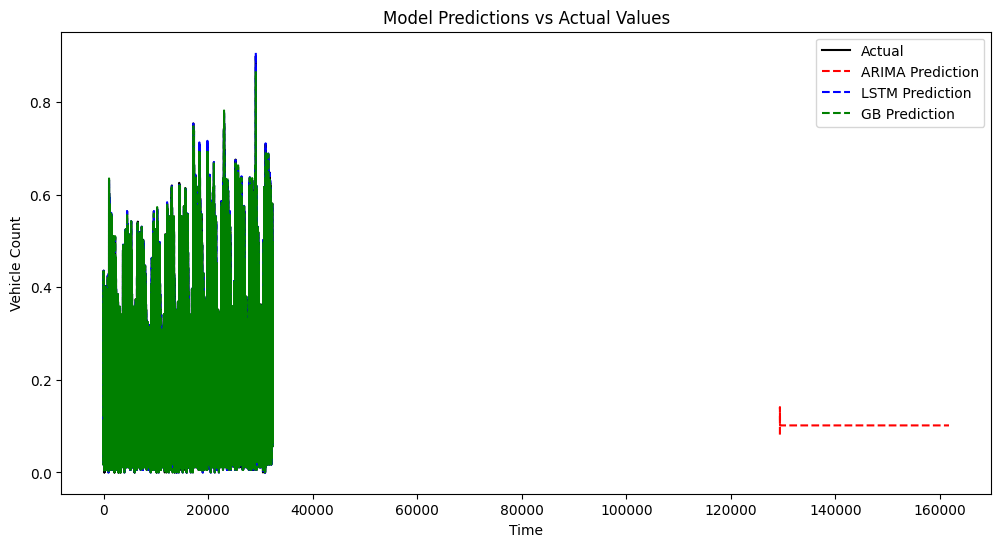

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_arima, label='ARIMA Prediction', linestyle='dashed', color='red')
plt.plot(y_pred_lstm, label='LSTM Prediction', linestyle='dashed', color='blue')
plt.plot(y_pred_gb, label='GB Prediction', linestyle='dashed', color='green')
plt.legend()
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.show()

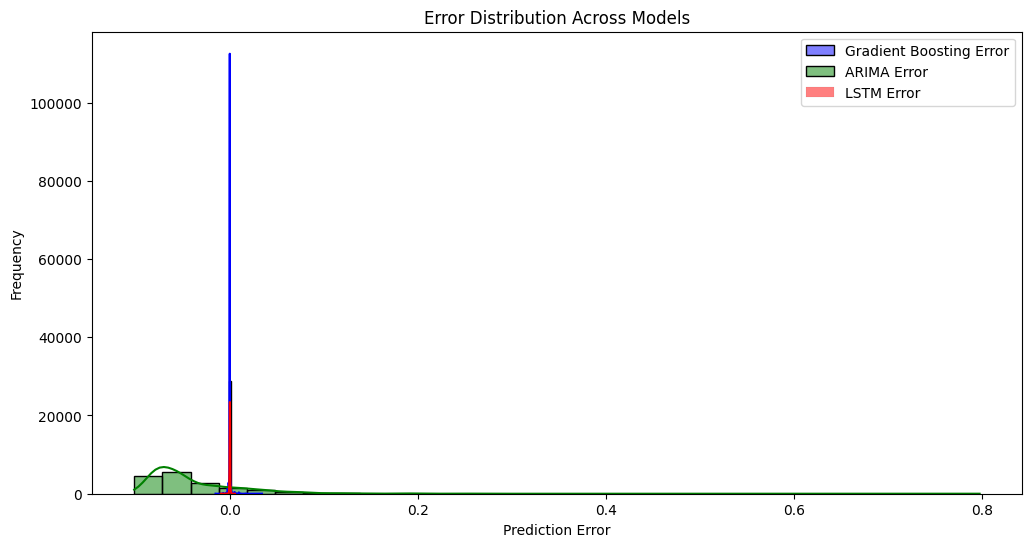

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(y_test - y_pred_gb, bins=30, kde=True, color='blue', label='Gradient Boosting Error')
sns.histplot(y_test - y_pred_arima, bins=30, kde=True, color='green', label='ARIMA Error')
sns.histplot(y_test - y_pred_lstm, bins=30, kde=True, color='red', label='LSTM Error')
plt.legend()
plt.title("Error Distribution Across Models")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

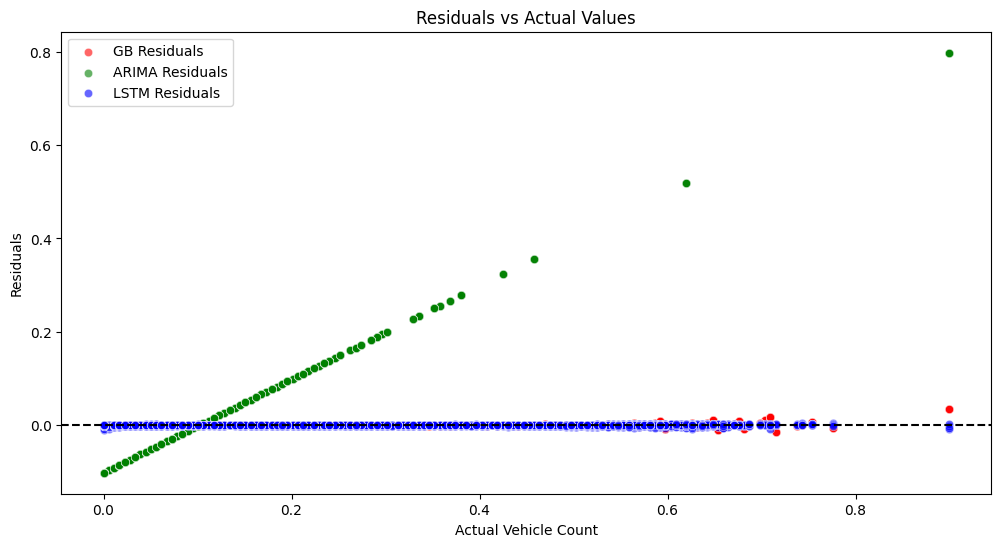

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_test - y_pred_gb, label='GB Residuals', alpha=0.6 , color='red')
sns.scatterplot(x=y_test, y=y_test - y_pred_arima, label='ARIMA Residuals', alpha=0.6, color='green')
sns.scatterplot(x=y_test, y=y_test - y_pred_lstm, label='LSTM Residuals', alpha=0.6, color='blue')
plt.axhline(0, linestyle='dashed', color='black')
plt.legend()
plt.title("Residuals vs Actual Values")
plt.xlabel("Actual Vehicle Count")
plt.ylabel("Residuals")
plt.show()